# **Importing LIbreris & Datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train=pd.read_csv('/content/Titanic_train.csv')
df_test=pd.read_csv('/content/Titanic_test.csv')

In [3]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


# **Visualization & Correlation**

Text(0.5, 1.0, 'Age Distribution')

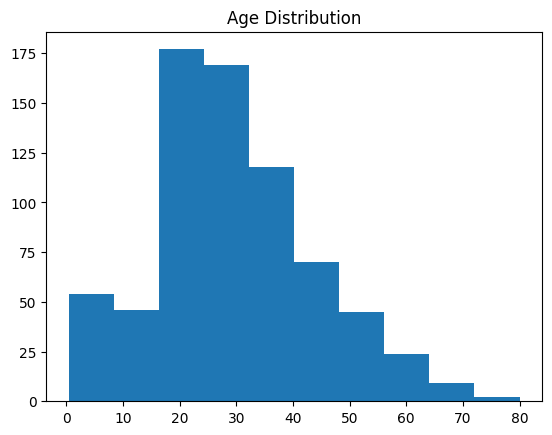

In [7]:
plt.hist(df_train['Age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Fare Distribution')

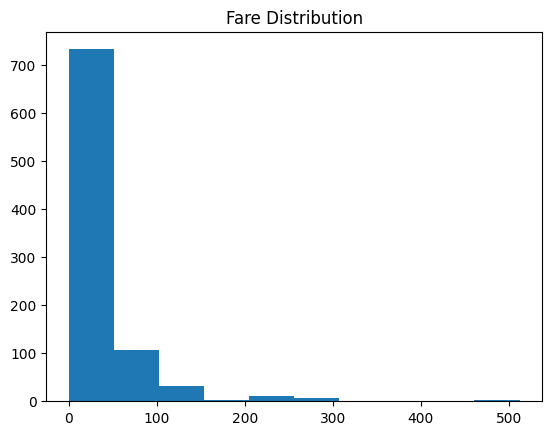

In [8]:
plt.hist(df_train['Fare'])
plt.title("Fare Distribution")

<Axes: xlabel='Pclass'>

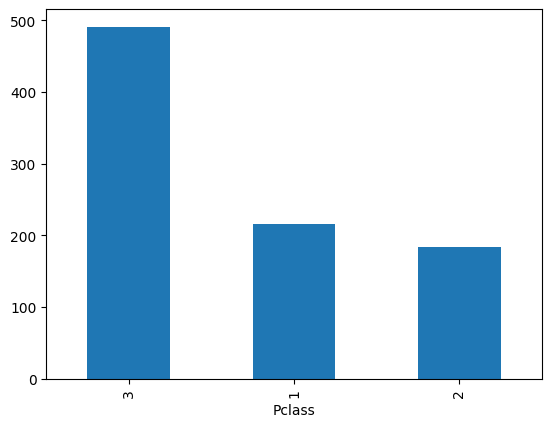

In [9]:
df_train['Pclass'].value_counts().plot.bar()

<Axes: xlabel='Sex'>

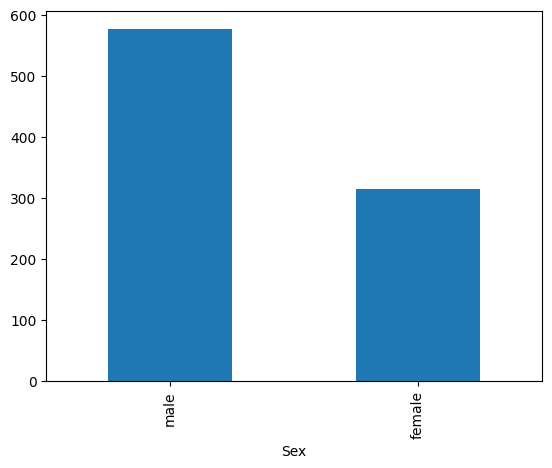

In [10]:
df_train['Sex'].value_counts().plot.bar()

<Axes: xlabel='Embarked'>

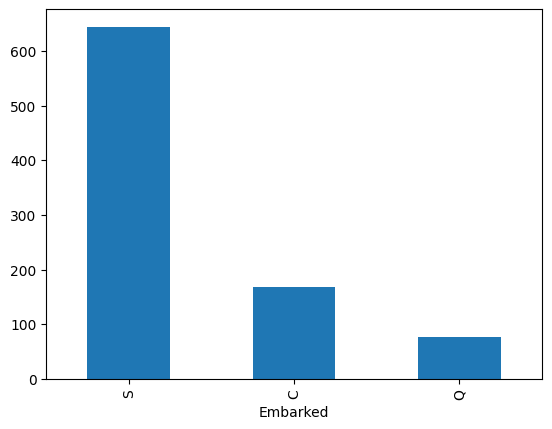

In [11]:
df_train['Embarked'].value_counts().plot.bar()

<Axes: xlabel='Survived'>

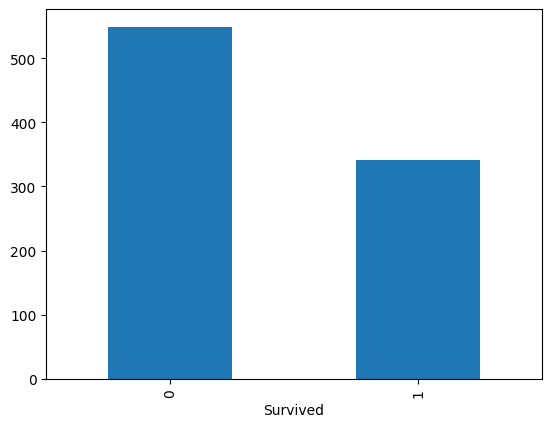

In [12]:
df_train['Survived'].value_counts().plot.bar()

In [13]:
df_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

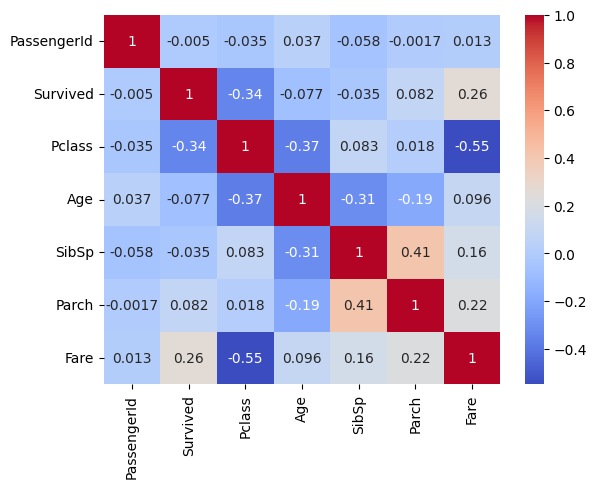

In [14]:
sns.heatmap(df_train.corr(numeric_only=True),annot=True,cmap='coolwarm')

# **Missing Value Imputation**

In [15]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)  # numeric column so filled with their median
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True) # categorical column so filled with their mode

In [16]:
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0],inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [17]:
df_train['Age'].isnull().sum()

np.int64(0)

In [18]:
df_train['Embarked'].isnull().sum()

np.int64(0)

In [19]:
df_test['Age'].isnull().sum()

np.int64(0)

In [20]:
df_test['Embarked'].isnull().sum()

np.int64(0)

# **Drop Columns**

In [21]:
df_train=df_train.drop(["PassengerId",'Name','Ticket','Cabin'],axis=1) #Dropped unimportant columns.
df_test=df_test.drop(["PassengerId",'Name','Ticket','Cabin'],axis=1) # dropping from testing data because its helpful for validations.

# **Encoding Categirical variable**

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df_train['Sex']= LabelEncoder().fit_transform(df_train['Sex']) # 0 = female, Male = 1

In [24]:
df_test['Sex']=LabelEncoder().fit_transform(df_test['Sex'])

In [25]:
df_train['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [26]:
df_train['Embarked']=LabelEncoder().fit_transform(df_train['Embarked']) # 0=C,  1=Q , 3=S

In [27]:
df_test['Embarked']=LabelEncoder().fit_transform(df_test['Embarked'])

In [28]:
df_train['Embarked']

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


# **Features and Target**

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [30]:
x_train=df_train.drop(['Survived'],axis=1)

In [31]:
y_train=df_train['Survived']

In [32]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [33]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# **Splitting Data**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x_train,y_train,test_size=0.2,random_state=42)

# **Model Building**

In [55]:
from sklearn.linear_model import LogisticRegression


In [37]:
log_reg=LogisticRegression(max_iter=500)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=500)

# **Predicting**

In [38]:
y_pred=log_reg.predict(x_test)

In [39]:
y_prob=log_reg.predict_proba(x_test)[:,1]

In [40]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

# **Evaluation**

In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [41]:
metrics={
    'Accuracy': accuracy_score(y_test,y_pred),
    'Precision': precision_score(y_test,y_pred),
    'Recall': recall_score(y_test,y_pred),
    'F1 Score':f1_score(y_test,y_pred),
    'ROC AUC': roc_auc_score(y_test,y_prob)
}

In [42]:
fpr,tpr,thresholds= roc_curve(y_test,y_prob)

In [43]:
metrics,(fpr,tpr)

({'Accuracy': 0.8100558659217877,
  'Precision': 0.7857142857142857,
  'Recall': 0.7432432432432432,
  'F1 Score': 0.7638888888888888,
  'ROC AUC': np.float64(0.8823680823680824)},
 (array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
         0.02857143, 0.03809524, 0.03809524, 0.0952381 , 0.0952381 ,
         0.1047619 , 0.1047619 , 0.11428571, 0.11428571, 0.14285714,
         0.14285714, 0.15238095, 0.15238095, 0.17142857, 0.17142857,
         0.19047619, 0.19047619, 0.2       , 0.2       , 0.21904762,
         0.21904762, 0.27619048, 0.27619048, 0.31428571, 0.31428571,
         0.37142857, 0.37142857, 0.47619048, 0.47619048, 0.5047619 ,
         0.5047619 , 0.58095238, 0.6       , 0.68571429, 0.68571429,
         0.72380952, 0.72380952, 0.74285714, 0.78095238, 0.82857143,
         0.82857143, 0.96190476, 0.96190476, 1.        ]),
  array([0.        , 0.01351351, 0.45945946, 0.45945946, 0.62162162,
         0.64864865, 0.64864865, 0.66216216, 0.66216216, 0.68918919,
 

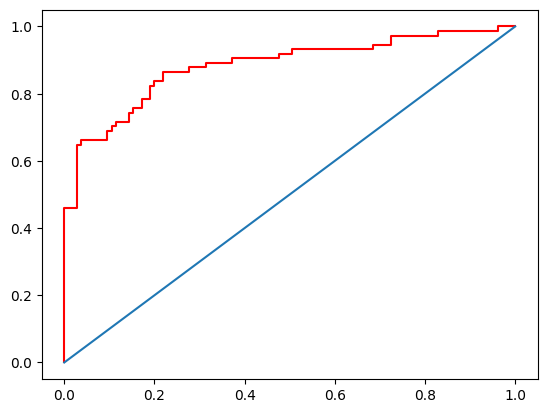

In [44]:
plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1])

In [45]:
Coefficients=log_reg.coef_[0]
Coefficients

array([-9.30679827e-01, -2.59699364e+00, -3.04330973e-02, -2.93904960e-01,
       -1.11853434e-01,  2.53419917e-03, -2.18776820e-01])

In [46]:
coefficients= pd.DataFrame({
    'Features': x_train.columns,
    'Coefficients' : log_reg.coef_[0]
})

In [47]:
coefficients

,Features,Coefficients
0,Pclass,-0.930680
1,Sex,-2.596994
2,Age,-0.030433
3,SibSp,-0.293905
4,Parch,-0.111853
5,Fare,0.002534
6,Embarked,-0.218777


# **Finding Significance Values**

In [48]:
import statsmodels.api as sm

In [49]:
x_train=sm.add_constant(x_train)

In [50]:
logit_model=sm.Logit(y_train,x_train)

In [51]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.448191
         Iterations 6


In [52]:
result.params # these are the coefficicent values of varables.

,0
const,4.767623
Pclass,-0.968808
Sex,-2.727713
Age,-0.031232
SibSp,-0.304490
Parch,-0.128386
Fare,0.002365
Embarked,-0.222358


In [53]:
print(result.pvalues) # these are the significance values of the variables. (p<0.05)

const       9.311561e-15
Pclass      2.940795e-10
Sex         3.992399e-35
Age         2.974152e-04
SibSp       7.885107e-03
Parch       3.421882e-01
Fare        3.536175e-01
Embarked    8.796904e-02
dtype: float64


# **Interview Questions**

In [57]:
'''
1. Presicion and Recall are both the evalution metrics of the classification model (Logistic regression model)
   they give us the performance values of classification model.

   Presicion Says : How many were actually positive values get From all the positive predictions which made by the model.
   its formula is : Precision=True Positives (TP) / False Positives (FP) + True Positives (TP)
​   Higher the presicion value means it says the good model or low false positive prediction.

   Recall Says: Out of all the actual positive cases, how many did the model correctly identify.
   its formula is : Recall = True Positive (TP) / True positive (TP) + False Negative (FN)
   Higher the recall values means low flase negative.

Both the matrics are present in the (sklearn.metrics) librery.
'''

'\n1. Presicion and Recall are both the evalution metrics of the classification model (Logistic regression model)\n   they give us the performance values of classification model.\n\n   Presicion Says : How many were actually positive values get From all the positive predictions which made by the model.\n   its formula is : Precision=True\xa0Positives\xa0(TP) / False\xa0Positives\xa0(FP) + True\xa0Positives\xa0(TP)\n\u200b   Higher the presicion value means it says the good model or low false positive prediction.\n\n   Recall Says: Out of all the actual positive cases, how many did the model correctly identify.\n   its formula is : Recall = True Positive (TP) / True positive (TP) + False Negative (FN)\n   Higher the recall values means low flase negative. \n\nBoth the matrics are present in the (sklearn.metrics) librery.\n'

In [59]:
'''
2. Cross Validation is mainly used for thr binary classifications.

   cross-validation splits the dataset multiple times to ensure the model’s
   performance, instead of training the model once and testing on a single test set,
   its for not just due to chance or overfitting.

   Important uses of the cross validations.

   a. We can use it for the better performance of the model.
   b. Its prevnting from the overfitting model.
   c. We can use cross validation scores for selecting best model.

Working of cross validations says as

  fistly in splits the all data in K-parts(folds), or N number of folds equally.
  then it uses 1 part for the test and the remaining for training.
  this process repeated for the k number times, and use different folds as test set.
  and select best from that all trained model.
  '''

'\n2. Cross Validation is mainly used for thr binary classifications.\n\n   cross-validation splits the dataset multiple times to ensure the model’s \n   performance, instead of training the model once and testing on a single test set, \n   its for not just due to chance or overfitting.\n\n   Important uses of the cross validations.\n\n   a. We can use it for the better performance of the model.\n   b. Its prevnting from the overfitting model.\n   c. We can use cross validation scores for selecting best model.\n\nWorking of cross validations says as\n  \n  fistly in splits the all data in K-parts(folds), or N number of folds equally.\n  then it uses 1 part for the test and the remaining for training.\n  this process repeated for the k number times, and use different folds as test set.\n  and select best from that all trained model.\n  '